# Python Assignment 6

ECE 7995_1801_003: Detection and Estimation Submitted 
By: Prabhjot Kaur

Sparse coding with the MNIST dataset.

In [60]:
import numpy as np
from scipy import linalg
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.fftpack as sp
from sklearn.decomposition import sparse_encode
from sklearn.decomposition import MiniBatchDictionaryLearning

In [61]:
#### 1) Download the entire MNIST dataset. 
# Create a standardized version of this dataset by subtracting the mean and dividing by the standard deviation of the dataset.
digits = datasets.load_digits()
images = digits.images
images_vec = np.zeros((images.shape[0],64)) #to store images as row vectors
for i in range(0,images.shape[0]):
    images_vec[i,:] =  images[i].flatten()
mean = np.mean(images,0).flatten()
data_centered = (images_vec - mean)/np.std(images_vec)

In [62]:
#### 2) For k=10, perform PCA on the dataset. You may use the sklearn.decomposition.PCA module if you wish.
pca = PCA(n_components=10)
pca.fit(data_centered)
W_PCA = pca.components_
print(W_PCA.shape)

(10, 64)


In [63]:
#### 3) Using the scipy.fftpack library, create the complete DCT dictionary for 64-dimensional signals.
#       to get a 2-D basis, we find a basis for the rows and the columns and take the Kronecker product.

W_1 = sp.dct(np.eye(8),type=2,norm='ortho')
W_2 = sp.dct(np.eye(8),type=2,norm='ortho')
W_DCT = np.kron(W_1,W_2)
print(W_DCT.shape)

(64, 64)


In [64]:
#### 4) Using sklearn.decomposition.MiniBatchDictionaryLearning, 
#       learn an overcomplete dictionary for the dataset with 100 atoms.

dl = MiniBatchDictionaryLearning(n_components=100, alpha=1)
W_OC = dl.fit(data_centered).components_
print(W_OC.shape)

(100, 64)


In [71]:
#### 5) Select five images at random from the image. Find the PCA encoding of each of these images. 
#       Then, using sklearn.decomposition.sparse_encode, find a sparse encoding of each of these images using the DCT and 
#       overcomplete dictionaries and ten dictionary atoms
indices = np.random.choice(1796,5)

this_data_PCA = np.zeros((5,64))
this_data_DCT = np.zeros((5,64))
this_data_OC = np.zeros((5,64))

# Image encoding
for i in range(0,5):
    idx = indices[i]
    this_data = data_centered[idx]
    #PCA encoding
    #W_PCA = pca.components_
    this_data_PCA[i,:] = W_PCA.T@W_PCA@this_data

    #Sparse encoding using the DCT
    DCT_coeffs = sparse_encode(np.reshape(this_data,(1,-1)),W_DCT,n_nonzero_coefs=10,algorithm='lars')
    this_data_DCT[i,:] = DCT_coeffs@W_DCT

    #Sparse encoding using the overcomplete dictionary
    OC_coeffs = sparse_encode(np.reshape(this_data,(1,-1)),W_OC,n_nonzero_coefs=10,algorithm='lars')
    this_data_OC[i,:] = OC_coeffs@W_OC



Normalized squared error for PCA reconstruction
[0.91578214 0.91668041 0.93055683 0.92511881 0.92071156]
Normalized squared error for DCT reconstruction
[0.96560731 0.98778655 0.97452229 0.97952099 0.97464775]
Normalized squared error for OC reconstruction
[0.93076981 0.94064143 0.91613266 0.92723739 0.91202123]


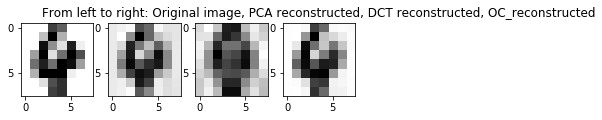

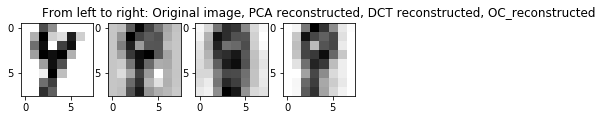

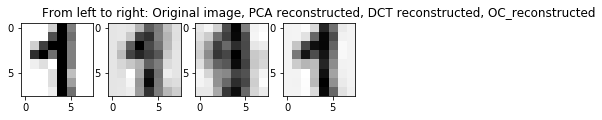

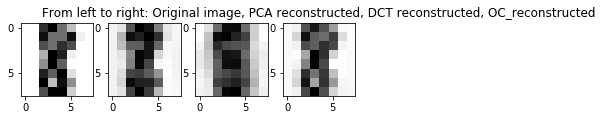

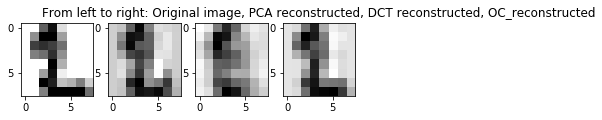

In [72]:
#### 6) Display the original and reconstructed images. Quantify the performance of each algorithm by computing 
#       the normalized squared error (norm squared of original - reconstructed image divided by the norm of the original image.)
error_PCA = np.zeros(5)
error_DCT = np.zeros(5)
error_OC = np.zeros(5)
for i in range(0,5):
    plt.figure(figsize=(6,10))
    
    plt.subplot(1,4,1)
    plt.imshow(images[indices[i]], cmap=plt.cm.gray_r)
    
    plt.subplot(1,4,2)
    plt.imshow(np.reshape(this_data_PCA[i,:]+mean/np.std(images_vec),(8,8)), cmap=plt.cm.gray_r)

    plt.subplot(1,4,3)
    plt.imshow(np.reshape(this_data_DCT[i,:]+mean/np.std(images_vec),(8,8)), cmap=plt.cm.gray_r)

    plt.subplot(1,4,4)
    plt.imshow(np.reshape(this_data_OC[i,:]+mean/np.std(images_vec),(8,8)), cmap=plt.cm.gray_r)
    
    plt.title('From left to right: Original image, PCA reconstructed, DCT reconstructed, OC_reconstructed')
    
    error_PCA[i] = np.square(np.linalg.norm(images[indices[i]].flatten() -  this_data_PCA[i,:]))/ np.square(np.linalg.norm(images[indices[i]].flatten()))
    error_DCT[i] = np.square(np.linalg.norm(images[indices[i]].flatten() -  this_data_DCT[i,:]))/ np.square(np.linalg.norm(images[indices[i]].flatten()))
    error_OC[i] = np.square(np.linalg.norm(images[indices[i]].flatten() -  this_data_OC[i,:]))/ np.square(np.linalg.norm(images[indices[i]].flatten()))

print('Normalized squared error for PCA reconstruction')
print(error_PCA)
print('Normalized squared error for DCT reconstruction')
print(error_DCT)
print('Normalized squared error for OC reconstruction')
print(error_OC)
